<a href="https://colab.research.google.com/github/Harshit11072000/MachineLearning/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install quandl

In [82]:
import quandl 
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [83]:
df = quandl.get("EOD/AAPL", authtoken="KHNv5J2D_QpEdw_ogxza")

In [84]:
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0


In [85]:
(df['Split']).value_counts() #One Time Only the Stock Split happened

1.0    1089
7.0       1
Name: Split, dtype: int64

In [86]:
(df['Dividend']).value_counts() #only 17 times there is a dividend raise

0.00    1073
0.57       4
0.52       4
0.47       3
0.63       3
3.05       2
3.29       1
Name: Dividend, dtype: int64

In [87]:
df.corr() #Correlation with highest columns are being considered

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Open,1.000000,0.999948,0.999935,0.999866,-0.547597,0.088894,-0.019234,-0.534445,-0.537418,-0.531829,-0.534399,0.502054
High,0.999948,1.000000,0.999941,0.999944,-0.545893,0.088582,-0.019154,-0.535283,-0.538038,-0.532575,-0.534990,0.504125
Low,0.999935,0.999941,1.000000,0.999949,-0.550156,0.089065,-0.019259,-0.533844,-0.536724,-0.530960,-0.533517,0.498174
Close,0.999866,0.999944,0.999949,1.000000,-0.548315,0.088610,-0.019044,-0.534448,-0.537173,-0.531552,-0.533903,0.500617
Volume,-0.547597,-0.545893,-0.550156,-0.548315,1.000000,-0.061064,0.054382,0.085888,0.095572,0.071723,0.081938,0.337092
Dividend,0.088894,0.088582,0.089065,0.088610,-0.061064,1.000000,-0.002708,-0.050353,-0.051215,-0.050306,-0.051095,0.002395
Split,-0.019234,-0.019154,-0.019259,-0.019044,0.054382,-0.002708,1.000000,-0.024993,-0.024640,-0.025124,-0.023978,0.029564
Adj_Open,-0.534445,-0.535283,-0.533844,-0.534448,0.085888,-0.050353,-0.024993,1.000000,0.999528,0.999416,0.998987,-0.549990
Adj_High,-0.537418,-0.538038,-0.536724,-0.537173,0.095572,-0.051215,-0.024640,0.999528,1.000000,0.999278,0.999526,-0.544404
Adj_Low,-0.531829,-0.532575,-0.530960,-0.531552,0.071723,-0.050306,-0.025124,0.999416,0.999278,1.000000,0.999558,-0.560073


In [88]:
df = df.drop(['Open','High','Low','Close','Volume','Dividend','Split'],axis=1)

In [89]:
df['HL_PCT'] = (df['Adj_High']-df['Adj_Low'])/(df['Adj_Close'])*100
df['PCT_Change'] = (df['Adj_Close']-df['Adj_Open'])/(df['Adj_Open'])*100

In [90]:
df

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_Change
Date,,,,,,,
2013-09-03,15.619650,15.857223,15.437510,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
...,...,...,...,...,...,...,...
2017-12-21,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287
2017-12-22,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
2017-12-26,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660


In [142]:
d2 = df[['Adj_Close','PCT_Change','HL_PCT','Adj_Volume']]

In [143]:
d2.fillna(-99999)

,Adj_Close,PCT_Change,HL_PCT,Adj_Volume
Date,,,,
2013-09-03,15.476472,-0.916650,2.711941,331928800.0
2013-09-04,15.796753,-0.173953,1.195129,345032800.0
2013-09-05,15.688388,-0.995502,1.421447,236367600.0
2013-09-06,15.781833,-0.044138,1.892738,359525600.0
2013-09-09,16.033661,0.231683,0.877176,340687200.0
...,...,...,...,...
2017-12-21,42.101646,0.482287,1.097080,83799584.0
2017-12-22,42.101646,0.188917,0.527970,65397776.0
2017-12-26,41.033528,-0.134660,1.050009,132742144.0


In [144]:
d2.shape

(1090, 4)

In [145]:
import matplotlib.pyplot as plt


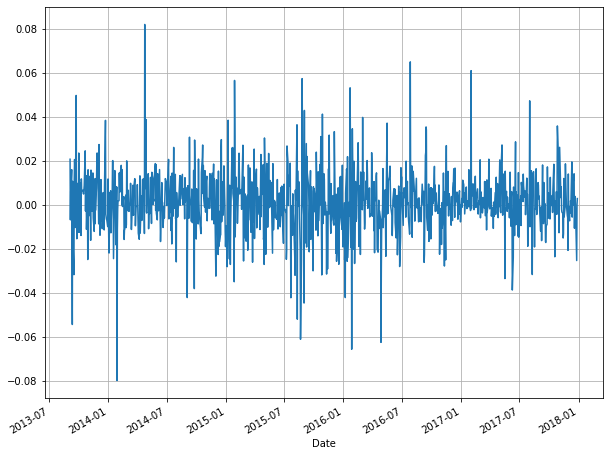

In [146]:
d2['Adj_Close'].pct_change().plot(figsize=(10,8),grid=True)

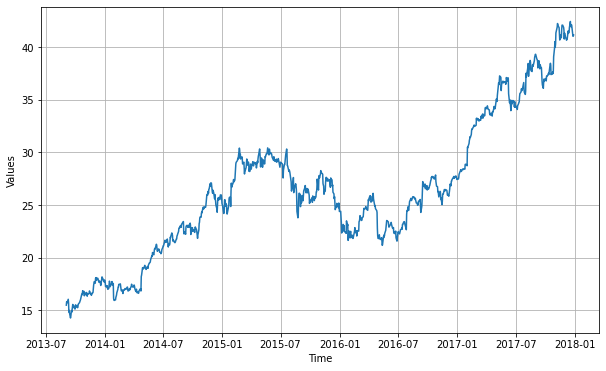

In [147]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(d2['Adj_Close'])

plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

In [148]:
d2.corr()

,Adj_Close,PCT_Change,HL_PCT,Adj_Volume
Adj_Close,1.000000,0.025237,-0.137288,-0.553474
PCT_Change,0.025237,1.000000,-0.060349,-0.079556
HL_PCT,-0.137288,-0.060349,1.000000,0.512480
Adj_Volume,-0.553474,-0.079556,0.512480,1.000000


In [151]:
df.head()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_Change
Date,,,,,,,
2013-09-03,15.619650,15.857223,15.437510,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683


In [153]:
label = d2['Adj_Close'].shift(-2)

label.dropna(inplace=True)
y = np.array(label)

X = d2[['Adj_Volume','PCT_Change','Adj_Volume']]
X_Later = X[-2:]
X = X[:-2]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=41)
print(X_later)

[[0.03530972 0.42589749 0.03530972]
 [0.11256507 0.44548283 0.11256507]
 [0.07039956 0.49015484 0.07039956]
 [0.06261365 0.41444589 0.06261365]
 [0.04707531 0.41331003 0.04707531]
 [0.0371667  0.46417064 0.0371667 ]
 [0.01911898 0.44503259 0.01911898]
 [0.08516751 0.423924   0.08516751]
 [0.03931777 0.45188409 0.03931777]
 [0.01963189 0.43576051 0.01963189]]


In [154]:
X.head()

,Adj_Volume,PCT_Change,Adj_Volume
Date,,,
2013-09-03,331928800.0,-0.916650,331928800.0
2013-09-04,345032800.0,-0.173953,345032800.0
2013-09-05,236367600.0,-0.995502,236367600.0
2013-09-06,359525600.0,-0.044138,359525600.0
2013-09-09,340687200.0,0.231683,340687200.0


In [182]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
X_Later = X[-200:]
X_Later = norm.transform(X_Later)
X_train.shape

(761, 3)

In [183]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
score = reg.score(X_test,Y_test)

In [184]:
forecast = []
forecast = reg.predict(X_later)
y_pred = reg.predict(X_test)

mse = mean_squared_error(Y_test,y_pred)
print(forecast.shape)

(200,)


In [188]:
print("mse",mse)
print("Score",score)

mse 31.691029602715943
Score 0.27668779921381004
